In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv("pose_data.csv")

In [3]:
df.head()

,P_x,P_y,O_z,O_w
0,0.207795,0.002223,0.011205,0.999937
1,0.411551,0.009009,0.022051,0.999757
2,0.612859,0.020023,0.032597,0.999469
3,0.818802,0.035607,0.042213,0.999109
4,1.027643,0.054191,0.045696,0.998955


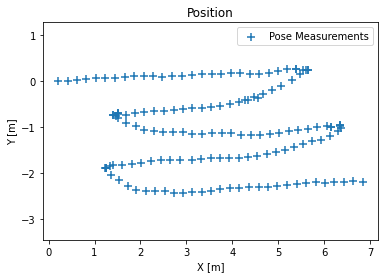

In [4]:
plt.scatter(df["P_x"],df["P_y"], s=50, label='Pose Measurements', marker='+')
# Start/Goal

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')
plt.show()

In [7]:
from geometry_msgs.msg import PoseWithCovarianceStamped, PoseStamped
from nav_msgs.msg import Odometry, Path
import rospy
pose = PoseStamped()
pose.header.frame_id = "map"
pose.pose.position.x = df["P_x"].values
pose.pose.position.y = df["P_y"].values
pose.pose.position.z = [0 for i in range(len(df))]
pose.pose.orientation.x = [0 for i in range(len(df))]
pose.pose.orientation.y = [0 for i in range(len(df))]
pose.pose.orientation.z = df["O_z"].values
pose.pose.orientation.w = df["O_w"].values

In [9]:
path = Path()
path.header.frame_id = "main"
# path.header.stamp = rospy.Time.now()
pose.header.stamp = path.header.stamp
path.poses.append(pose)

In [10]:
path

header: 
  seq: 0
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: "main"
poses: 
  - 
    header: 
      seq: 0
      stamp: 
        secs: 0
        nsecs:         0
      frame_id: "map"
    pose: 
      position: 
        x: [ 3.00168885e+00  2.64542394e+00  2.39697140e+00  2.16274388e+00
  1.92494888e+00  1.69114983e+00  1.44701483e+00  1.21729438e+00
  9.89662721e-01  7.43348582e-01  5.11818243e-01  2.66943046e-01
  2.33958928e-02 -2.20620204e-01 -4.58015893e-01 -6.90721173e-01
 -9.58786336e-01 -1.20012653e+00 -1.45697648e+00 -1.69582036e+00
 -1.97599438e+00 -2.21251673e+00 -2.30196754e+00 -2.67801462e+00
 -2.67698790e+00 -2.67415964e+00 -2.58504837e+00 -2.56297132e+00
 -2.47866613e+00 -2.28272126e+00 -2.03104396e+00 -1.74371698e+00
 -1.41374117e+00 -1.18760529e+00 -9.59902980e-01 -7.10666857e-01
 -4.66099693e-01 -2.32775149e-01 -1.83928740e-03  2.27883834e-01
  4.73143310e-01  7.02563866e-01  9.30673347e-01  1.17381704e+00
  1.43815328e+00  1.66901118e+00  1.89723465e+00  

In [ ]:
x = np.array(df["P_x"].values)
y = np.array(df["P_y"].values)

In [ ]:
# cnt = 0
a_ = []
b_ = []

for i in range(x.shape[0]):
    if i<1:
#         b_.append(x[i])
        continue
    else:
#         print(cnt)
        b = [x[i]-x[i-1],y[i] - y[i-1]]
        b_.append(b)
#         cnt+=1

# cnt = 0
for i in range(x.shape[0]):
    if i>x.shape[0]-2:
#         a_.append(x[i])
        continue
    else:
#         print(cnt)
        a = [x[i]-x[i+1], y[i] - y[i+1]]
        a_.append(a)
#         cnt+=1
    

In [ ]:
a_

In [ ]:
a = np.array(a_)
b = np.array(b_)

In [ ]:
def unit_vector(val):
    unit_val = val / np.linalg.norm(val)
    return unit_val

In [ ]:
unit_vector(a[0])

In [ ]:
np.linalg.norm(a[0])

In [ ]:
a_mod

In [ ]:
a[0]*b[0]

In [ ]:
def angle_between(v1, v2):
    dot_pr = v1.dot(v2)
    norms = np.linalg.norm(v1) * np.linalg.norm(v2)
    return np.rad2deg(np.arccos(dot_pr / norms))

In [ ]:
angle_between(a[0], b[0])

In [ ]:
#unit vector implementation
a = np.array([1,2,3])
b = np.array([4,5,6])
def unit_vector(val):
    unit_val = val / np.linalg.norm(val)
    return unit_val

unit_a = unit_vector(a)
print(unit_a)

unit_b = unit_vector(b)
print(unit_b)

C = (unit_a*unit_b)
print(C)

In [ ]:
def unit_vector(v):
    return v / np.linalg.norm(v)
u = np.array([3, 6, 4])
print(unit_vector(u))

In [ ]:
def angle_between(v1, v2):
    dot_pr = v1.dot(v2)
    norms = np.linalg.norm(v1) * np.linalg.norm(v2)
 
    return np.rad2deg(np.arccos(dot_pr / norms))
v = np.array([1, 4, 5])
u = np.array([2, 1, 5])
print(angle_between(v, u))

In [ ]:
pose_data = open("pose_data.csv", mode='w+')
pose_data.write("{},{},{},{}\n".format("P_x","P_y", "O_z", "O_w"))

In [ ]:
old_x = 0
old_y = 0

down_sample_Px = []
down_sample_Py = []

for P_x, P_y, O_z, O_w in zip(df["P_x"], df["P_y"], df["O_z"], df["O_w"] ):
    curr_dis = abs(math.sqrt((P_x - old_x)**2 + (P_y - old_y)**2))
    if curr_dis > 1.0:
        print(P_x, P_y)
        pose_data.write("{},{},{},{}\n".format(P_x, P_y, O_z, O_w))
        
        down_sample_Px.append(P_x)
        down_sample_Py.append(P_y)
        
        old_x = P_x
        old_y = P_y
    
#     print(P_x, P_y, O_z, O_w)

In [ ]:
plt.scatter(down_sample_Px,down_sample_Py, s=50, label='Pose Measurements', marker='+')
# Start/Goal

plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Position')
# plt.legend(loc='best')
plt.axis('equal')
plt.show()